In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic daily website visitor data
dates = pd.date_range('2023-01-01', periods=365, freq='D')
visitors = np.random.poisson(lam=1000, size=365) + 50 * np.sin(np.linspace(0, 10 * np.pi, 365))  # Synthetic data with trend and seasonality

# Create a DataFrame
df = pd.DataFrame({'Date': dates, 'Visitors': visitors})

# Display the first few rows
print(df.head())

        Date     Visitors
0 2023-01-01   998.000000
1 2023-01-02   978.310019
2 2023-01-03   967.587953
3 2023-01-04   990.801955
4 2023-01-05  1040.920654


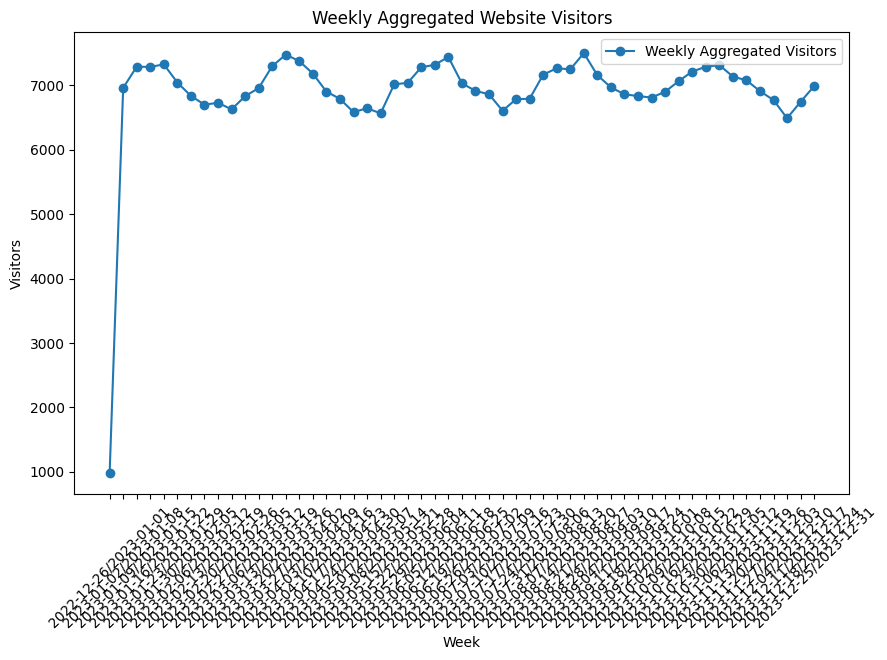

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic daily website visitor data
dates = pd.date_range('2023-01-01', periods=365, freq='D')
visitors = np.random.poisson(lam=1000, size=365) + 50 * np.sin(np.linspace(0, 10 * np.pi, 365))  # Synthetic data with trend and seasonality

# Create a DataFrame
df = pd.DataFrame({'Date': dates, 'Visitors': visitors})

# Aggregate by week
df['Week'] = df['Date'].dt.to_period('W')

# Group by 'Week' and sum only the 'Visitors' column
weekly_aggregated = df.groupby('Week')['Visitors'].sum().reset_index()

# Plot aggregated data
plt.figure(figsize=(10, 6))
plt.plot(weekly_aggregated['Week'].astype(str), weekly_aggregated['Visitors'], label='Weekly Aggregated Visitors', marker='o')
plt.title('Weekly Aggregated Website Visitors')
plt.xlabel('Week')
plt.ylabel('Visitors')
plt.xticks(rotation=45)
plt.legend()
plt.show()

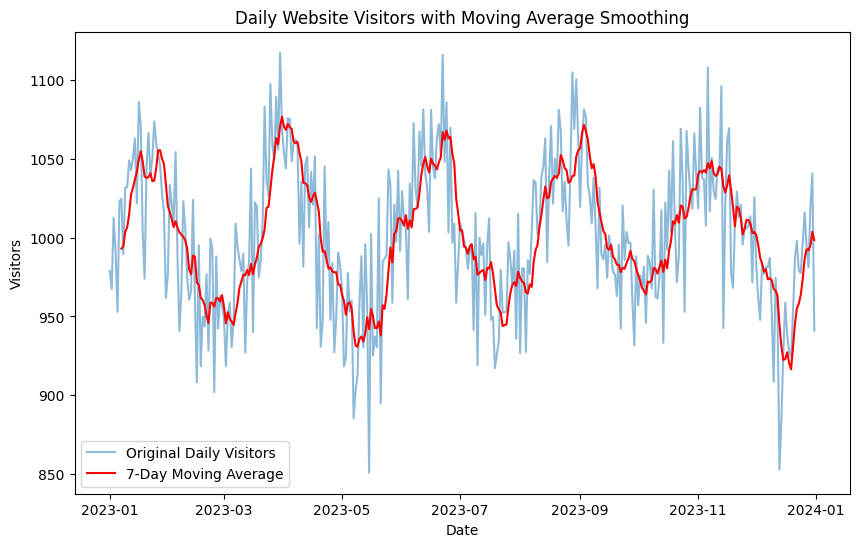

In [ ]:

# Smoothing with a 7-day moving average
window_size = 7  # Weekly moving average
df['Moving_Avg'] = df['Visitors'].rolling(window=window_size).mean()

# Plot original vs smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Visitors'], label='Original Daily Visitors', alpha=0.5)
plt.plot(df['Date'], df['Moving_Avg'], label=f'{window_size}-Day Moving Average', color='red')
plt.title('Daily Website Visitors with Moving Average Smoothing')
plt.xlabel('Date')
plt.ylabel('Visitors')
plt.legend()
plt.show()

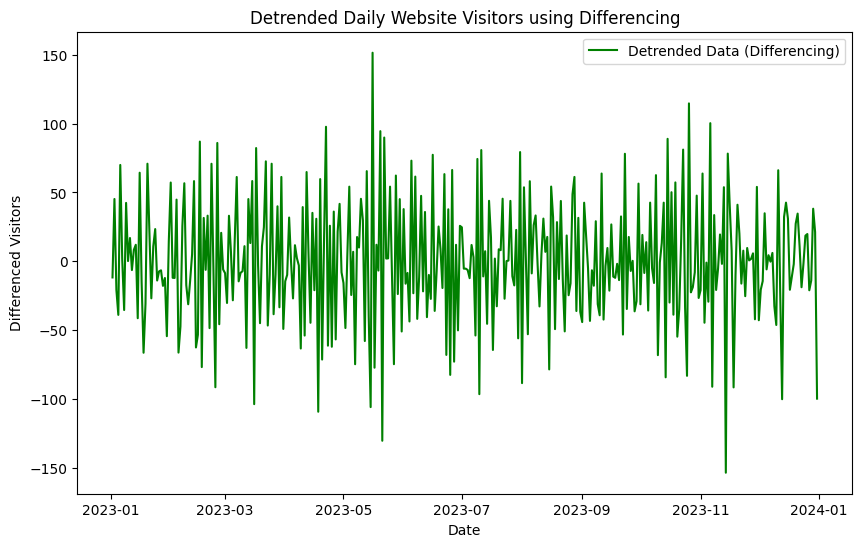

In [ ]:
# Differencing to remove trend
df['Differenced'] = df['Visitors'].diff()

# Plot detrended data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Differenced'], label='Detrended Data (Differencing)', color='green')
plt.title('Detrended Daily Website Visitors using Differencing')
plt.xlabel('Date')
plt.ylabel('Differenced Visitors')
plt.legend()
plt.show()

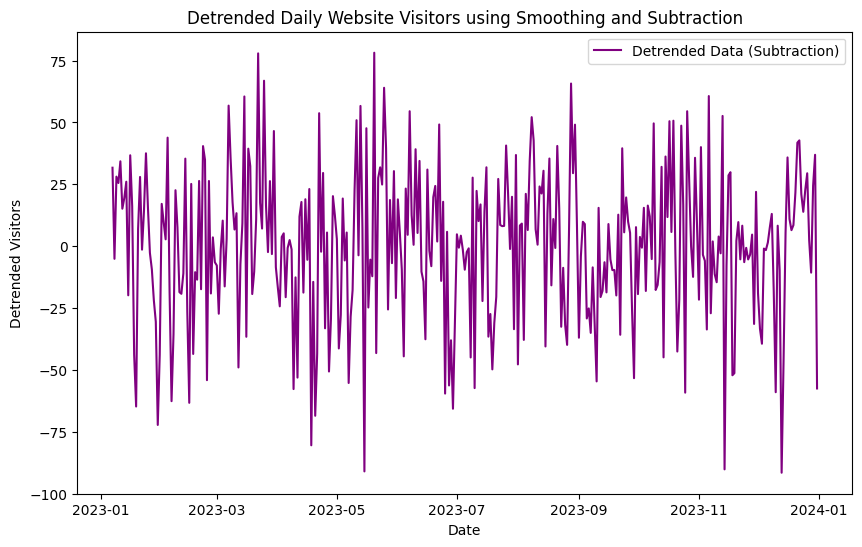

In [ ]:
# Subtracting the moving average from the original data
df['Detrended'] = df['Visitors'] - df['Moving_Avg']

# Plot detrended data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Detrended'], label='Detrended Data (Subtraction)', color='purple')
plt.title('Detrended Daily Website Visitors using Smoothing and Subtraction')
plt.xlabel('Date')
plt.ylabel('Detrended Visitors')
plt.legend()
plt.show()